# Music Genres Over Time

## What genres have been most popular in the US over the years?

### A computational essay by Aaron Huang and Antoinette Tan, students at Olin College of Engineering.

Whenever you start or restart your notebook, run the following code cell to make sure that this notebook pulls in the latest version of your code:

In [1]:
%load_ext autoreload
%autoreload 2

## Introduction


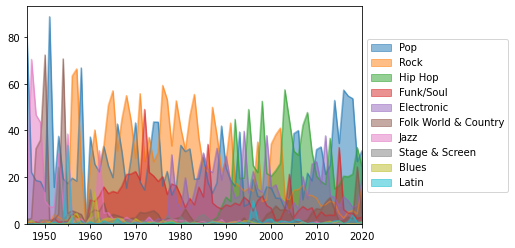

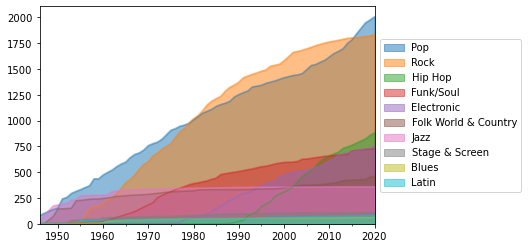

In [6]:
from density_chart import *

density_chart()
density_chart_cumulative()